# More linear regression algorithms

In this notebook, we're going to see lots of ways to do regression with `sklearn`.

In [6]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_imputed.csv')

df

,RPC,Description,Lithology,Vp [m/s],Vs [m/s],Rho [kg/m³]
0,104818,KIAMICHI FORMA. 4,sandstone,3045.60,1595.70,2108.0
1,104893,KIAMICHI REMOLD 3,sandstone,3000.60,1517.10,2126.0
2,104652,NAVAJO ARCO 2,sandstone,3363.60,2041.50,2162.0
3,104752,NAVAJO ARCO REMOL 1,sandstone,3195.30,1606.20,2160.0
4,104598,FERRON 82-3 1677.5,sandstone,4237.50,2448.60,2428.0
...,...,...,...,...,...,...
795,102178,R.PRICE 10909.5 #31,dolomite,4625.98,2759.19,2370.0
796,102225,R.PRICE 10916.5 #38,dolomite,5446.19,3116.80,2440.0
797,102088,R.PRICE 10883.5 #7,dolomite,5446.19,2998.69,2570.0
798,102213,R.PRICE 10913.5 #35,dolomite,5347.77,2933.07,2440.0


In [15]:
features = ['Vp [m/s]', 'Rho [kg/m³]']
X = df[features].values
y = df['Vs [m/s]'].values

X.shape

(800, 2)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((640, 2), (640,))

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

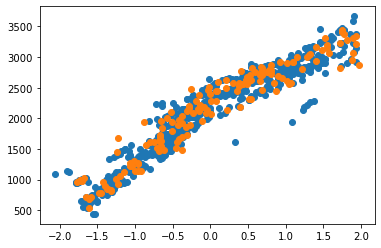

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def score(y_true, y_predicted):
    """
    Return the R2 and RMSE scores for a regression.
    
    Args:
        y_true (array): The true values, e.g. y_val or y_test.
        y_predicted (array): The predicted values.
        
    Returns:
        tuple: The R2 score and the RMSE.
        
    Example:
        >>> score([0.5, 1.5, 2.5], [0.5, 1.5, 2.5])
        (1.0, 0.0)
        >>> score([0.5, 1.5, 2.5], [0.4, 1.5, 2.6])
        (0.99, 0.08164965809277262)
    """
    return r2_score(y_true, y_predicted), np.sqrt(mean_squared_error(y_true, y_predicted))

## Linear regression by OLS

(0.9286905337547297, 198.6020117836149)

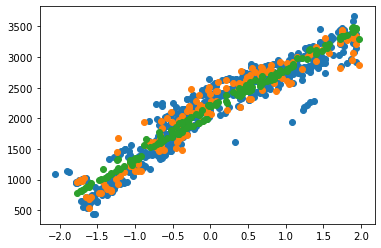

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

## K-nearest neighbours regressor

(0.9542518655168248, 159.0731001850431)

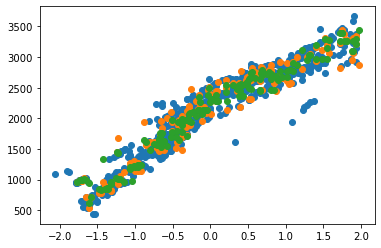

In [29]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

## Support vector machine

Not all that intuitive, but I found the figure here helpful https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively


(0.8694572832664759, 268.7115746364607)

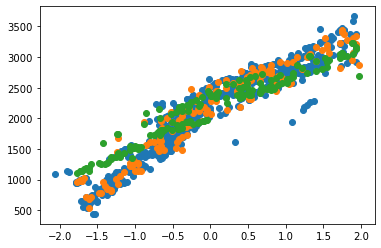

In [31]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

(0.25833823252442845, 640.4909483060445)

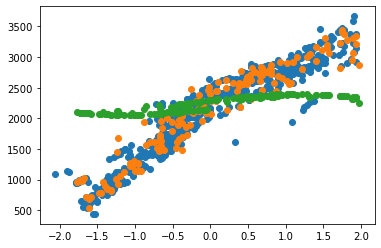

In [37]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

(0.9524534546821101, 162.169633088329)

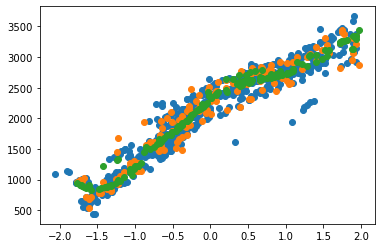

In [42]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_val[:, 0], y_val)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

(-8.300158412561949, 2268.0635736818817)

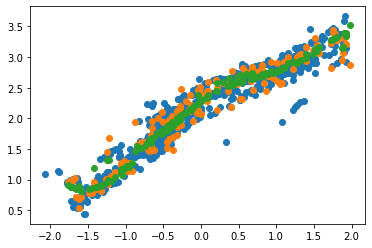

In [43]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1)
model.fit(X_train, y_train/1000)
y_pred = model.predict(X_val)

plt.scatter(X_train[:, 0], y_train/1000)
plt.scatter(X_val[:, 0], y_val/1000)
plt.scatter(X_val[:, 0], y_pred)

score(y_val, y_pred)

## Other models to try:

- Gaussian process
- Decision tree
- Random forest
- Neural network